# Finding Key Connectors

In [49]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Devin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"}
]

In [50]:
friendships = [(0,1), (0,2), (1,2), (1,3), (2, 3), (3, 4),
(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [51]:
#add a list of friends to each user
for user in users:
    user["friends"] = []

In [52]:
for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

In [53]:
#total number of connections
#sum up the lengths of all friends lists=
def number_of_friends(user):
    return len(user["friends"])

total_connections = sum(number_of_friends(user) for user in users)
total_connections

24

In [54]:
#divide by the number of users

from __future__ import division
num_users = len(users)
avg_connections = total_connections / num_users
avg_connections

2.4

In [55]:
#find people who have the largest number of friends
#sort users from 'most friends' to 'least friends'

num_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]
print (sorted(num_friends_by_id, key=lambda userid_numfriends: userid_numfriends[1], reverse=True))

[(1, 3), (2, 3), (3, 3), (5, 3), (8, 3), (0, 2), (4, 2), (6, 2), (7, 2), (9, 1)]


In [56]:
#friends of friends
def friends_of_friends_ids_bad(user):
    return [foaf['id'] for friend in user['friends'] for foaf in friend['friends']]

In [58]:
print([friend['id'] for friend in users[0]['friends']])

[1, 2]


In [59]:
#count of mutual friends
def not_the_same(user, other_user):
    return user['id'] != other_user['id']

In [60]:
def not_friends(user, other_user):
    return all(not_the_same(friend, other_user) for friend in user['friends'])

In [61]:
from collections import Counter

def friends_of_friend_ids(user):
    return Counter(foaf['id'] for friend in user['friends']
                  for foaf in friend['friends'] if not_the_same(user, foaf) and not_friends(user, foaf))

In [63]:
print(friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


# Data Scientists Interest

In [64]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [65]:
#find users with a certain interest
def data_scientists_who_likes(target_interest):
    return[user_id
          for user_id, user_interest in interests
          if user_interest == target_interest]

In [68]:
from collections import defaultdict

#keys are interests, values are lists of user_id with that interest
user_ids_by_interest = defaultdict(list)
for uid, interest in interests:
    user_ids_by_interest[interest].append(uid)
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [69]:
#keys are user_ids, values are lists of interests for that user_id
interests_of_user = defaultdict(list)

for uid, interest in interests:
    interests_of_user[uid].append(interest)
interests_of_user

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [70]:
def most_common_interests_with(user):
    return Counter(interested_user_id
                  for interest in interests_of_user[user['id']]
                  for interested_user_id in user_ids_by_interest[interest]
                  if interested_user_id != user['id'])

In [71]:
most_common_interests_with(users[0])

Counter({9: 3, 8: 1, 1: 2, 5: 1})

# Salaries and Experience

In [72]:
#salary (in dollaras) and tenure (in years)
salaries_and_tenures = [(83000, 8.7), (88000, 8.1), (48000, 0.7), (76000, 6), (69000, 6.5),
                       (76000, 7.5), (60000, 2.5), (83000, 10), (48000, 1.9), (63000, 4.2)]

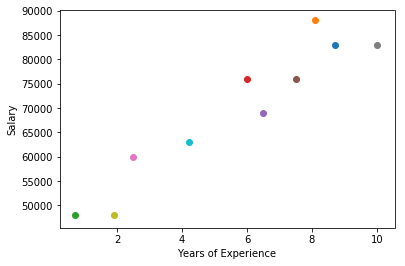

In [75]:
import matplotlib.pyplot as plt

for salary, tenure in salaries_and_tenures:
    plt.scatter(tenure, salary)
    
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()